In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 25 12:37:58 2023

@author: Michaela Bailová
"""

import numpy as np
from functools import partial
from tools import alokA, discretize, alokJ, alokDJ, qnorm, Lpnorma, DCCh

a = np.pi
b = np.pi
hx = np.pi/32
hy = np.pi/32
p = 2.5

Ps, Ts, s1, s2, s3, s4 = discretize(a, b, hx, hy)
S12 = np.union1d(s1, s2)
S34 = np.union1d(s3, s4)
Ss = np.union1d(S12, S34)

x = np.arange(0, a+hx, hx)
y = np.arange(0, b+hy, hy)

nx = len(x)
ny = len(y)
nTx = nx-1
nTy = ny-1
[X, Y] = np.meshgrid(x, y)
initMat = np.sin(X)*np.sin(Y)
init = np.reshape(initMat, (nx*ny, 1), order='F')
init[Ss-1] = 0
A = alokA(Ps, Ts, Ss)
# lap=alokJ(3,Ps,Ts,Ss,init)
# smer=alokDJminmax_exact_descent(3,Ps,Ts,Ss,A,init,init)
# func=alokDJminmax_exact_functional(3,Ps,Ts,Ss,init,init)

f = partial(alokJ, 3, Ps, Ts, Ss)
# t,val = zlatyrez(f,0,1,init,smer,0.00001)

f = partial(alokJ, p, Ps, Ts, Ss)
df = partial(alokDJ, p, Ps, Ts, Ss, A)
# xGM,Jmin,itmin =gradientfunGoldenSection(p,Ps,Ts,Ss,init,f,df,1e-3)
xGM, Jmin, itmin = DCCh(p, Ps, Ts, Ss, init, f, df, 1e-3)

a = qnorm(p, Ps, Ts, Ss, xGM)**p
b = Lpnorma(4, Ps, Ts, Ss, xGM)
constant = (a/b)**(1/(4-p))
xmin = xGM*constant


In [15]:
itmin

5

In [9]:
xmin[1,:]

array([0., 0.])

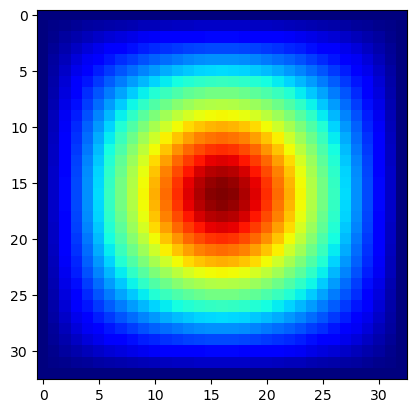

In [13]:
import matplotlib.pyplot as plt
plt.imshow(np.reshape(xmin[:,1], (nx, ny), order='F'), cmap='jet')